# Bài tập 3


Triệu Nhật Minh - 21127112

---

# Generalization Error

## 1 - 3

$$\mathbb{P}[|E_{\text{in}}(g) - E_{\text{out}}(g)| > \epsilon] \leq 2Me^{-2\epsilon^2N}$$

$2Me^{-2\epsilon^2N} \leq 0.03$

$\Leftrightarrow 2\epsilon^2N \geq -\ln{\frac{0.03}{2M}}$

$\Leftrightarrow N \geq \frac{-\ln{\frac{0.03}{2M}}}{2\epsilon^2}$

### Import các thư viện cần thiết

In [1]:
from math import log
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

In [2]:
def solve(M, epsilon=0.05):
    return -log(0.03/(2*M))/(2*epsilon**2)

## 1.

In [3]:
solve(M=1)

839.9410155759853

[1] The correct answer is [b] 1000

## 2.

In [4]:
solve(M=10)

1300.4580341747942

[2] The correct answer is [c] 1500

## 3.

In [5]:
solve(M=100)

1760.9750527736032

[3] The correct answer is [d] 2000

# Break Point

## 4. 

A set of points is said to be shattered by a perceptron model if, for every possible assignment of two labels to the points (considering binary classification), there exists some perceptron in the model that classifies the points according to that assignment.

In the 3D case, we are considering perceptrons that classify points based on one side of a plane or the other. Therefore, to say that a set of points can be shattered by the 3D perceptron model is to say that, for every possible labeling of the points, we can find a plane such that all points on one side of the plane have one label and all points on the other side have the other label.

Given that the minimum number of points that cannot be separated by a Perceptron Model in a two-dimensional (2D) space is 4, it follows that in a three-dimensional (3D) space, this minimum number must exceed 4.

Let's consider a scenario where we have 5 points that we aim to separate using a 3D perceptron. It's important to note that none of the subsets of 4 points from these 5 should lie on the same plane, as this would create ambiguity with the 2D case.

In a 3D space, any 4 points can be used to form a tetrahedron. Let's assume that the 5th point is located within this tetrahedron (refer to the figure below for visualization).

![](./imgs/3_1.png)

Observing that point E is situated within the tetrahedron formed by points A, B, C, and D, if point E indeed lies inside, we adjust the configuration such that point E becomes part of a new tetrahedron. This new arrangement will leave out one point from the original tetrahedron, which in this scenario is point B.

![](./imgs/3_2.png)

In a three-dimensional space, a plane can always be formed using any three points. In this particular scenario, such a plane can be constructed that includes points C, D, and E (refer to the accompanying figure for a visual representation).

![](./imgs/3_3.png)

If we paint A and B with red color, and C, D, E with blue color, we can see that there is no way to separate the red points from the blue points with a plane. Therefore, we cannot shatter 5 points with a 3D perceptron.

![](./imgs/3_4.png)

This shows that the 3D perceptron model cannot shatter this set of 5 points, and so the break point for the 3D perceptron model is 5.

[4] The correct answer is [b] 5

# Growth Function

## 5.

We have theses results:
- The growth function is $2^N$ when there is no breakpoint in $H$.
- When $H$ has a breakpoint at k, $m_H(N)\le \sum_{i=0}^{k-1} {{N}\choose{i}}$.

i) $1 + N$ \
$1 + N \le 2^N$ for all $N \ge 0 $ \
$\Rightarrow$ There is a breakpoint $k$.

We realize that if $k = 2$, $m_H(N) \le 1 + N$. Hence, it is a growth function. It is the growth function of positive rays.

ii) $1 + N + {{N}\choose{2}}$ \
$1 + N + {{N}\choose{2}} \le 2^N$ for all $N \ge 2 $ \
$\Rightarrow$ There is a breakpoint $k$. When we simplify the formula, we get a quadratic term, indicating a breakpoint at $k=3$. 

It is true that if we write $\sum_{i=0}^{3-1} {N \choose i} = {N \choose 0} + {N \choose 1} + {N \choose 2} = 1 + N + \frac{N(N-1)}{2} = 1 + N + {N \choose 2}$

Hence, the formula is a growth function. It is the growth function of positive intervals.

iii) $\sum_{i=1}^{\lfloor \sqrt N \rfloor} {N \choose i}$

$\sum_{i=1}^{\lfloor \sqrt N \rfloor} {N \choose i} < \sum_{i=1}^{N} {N \choose i} = 2^N - 1 < 2^N$

$\Rightarrow$ If it were a growth function, it would be bounded by a polynomial. 

But we have: $\sum_{i=1}^{\lfloor \sqrt N \rfloor} {N \choose i} > \sum_{i=1}^{\lfloor \sqrt N \rfloor} {\lfloor \sqrt N \rfloor \choose i} = 2^{\lfloor \sqrt N \rfloor} - 1$

$2^{\lfloor \sqrt N \rfloor} - 1 < 2^N$ is a non-polynomial function of N and is smaller than $2^N$. Hence, it is not a growth function.

iv) $2^{\lfloor N/2 \rfloor}$ \
Mr. Yaser Abu-Mostafa said if a growth function is not bounded by a polynomial, it must be $2^N$. Hence, this is not a growth function.

v) $2^N$
This is obviously a growth function.

[5] The correct answer is [b] i, ii, and v

# Fun with Intervals

## 6 - 8

## 6.

Visualize the possibilities of the intervals from $N=4$

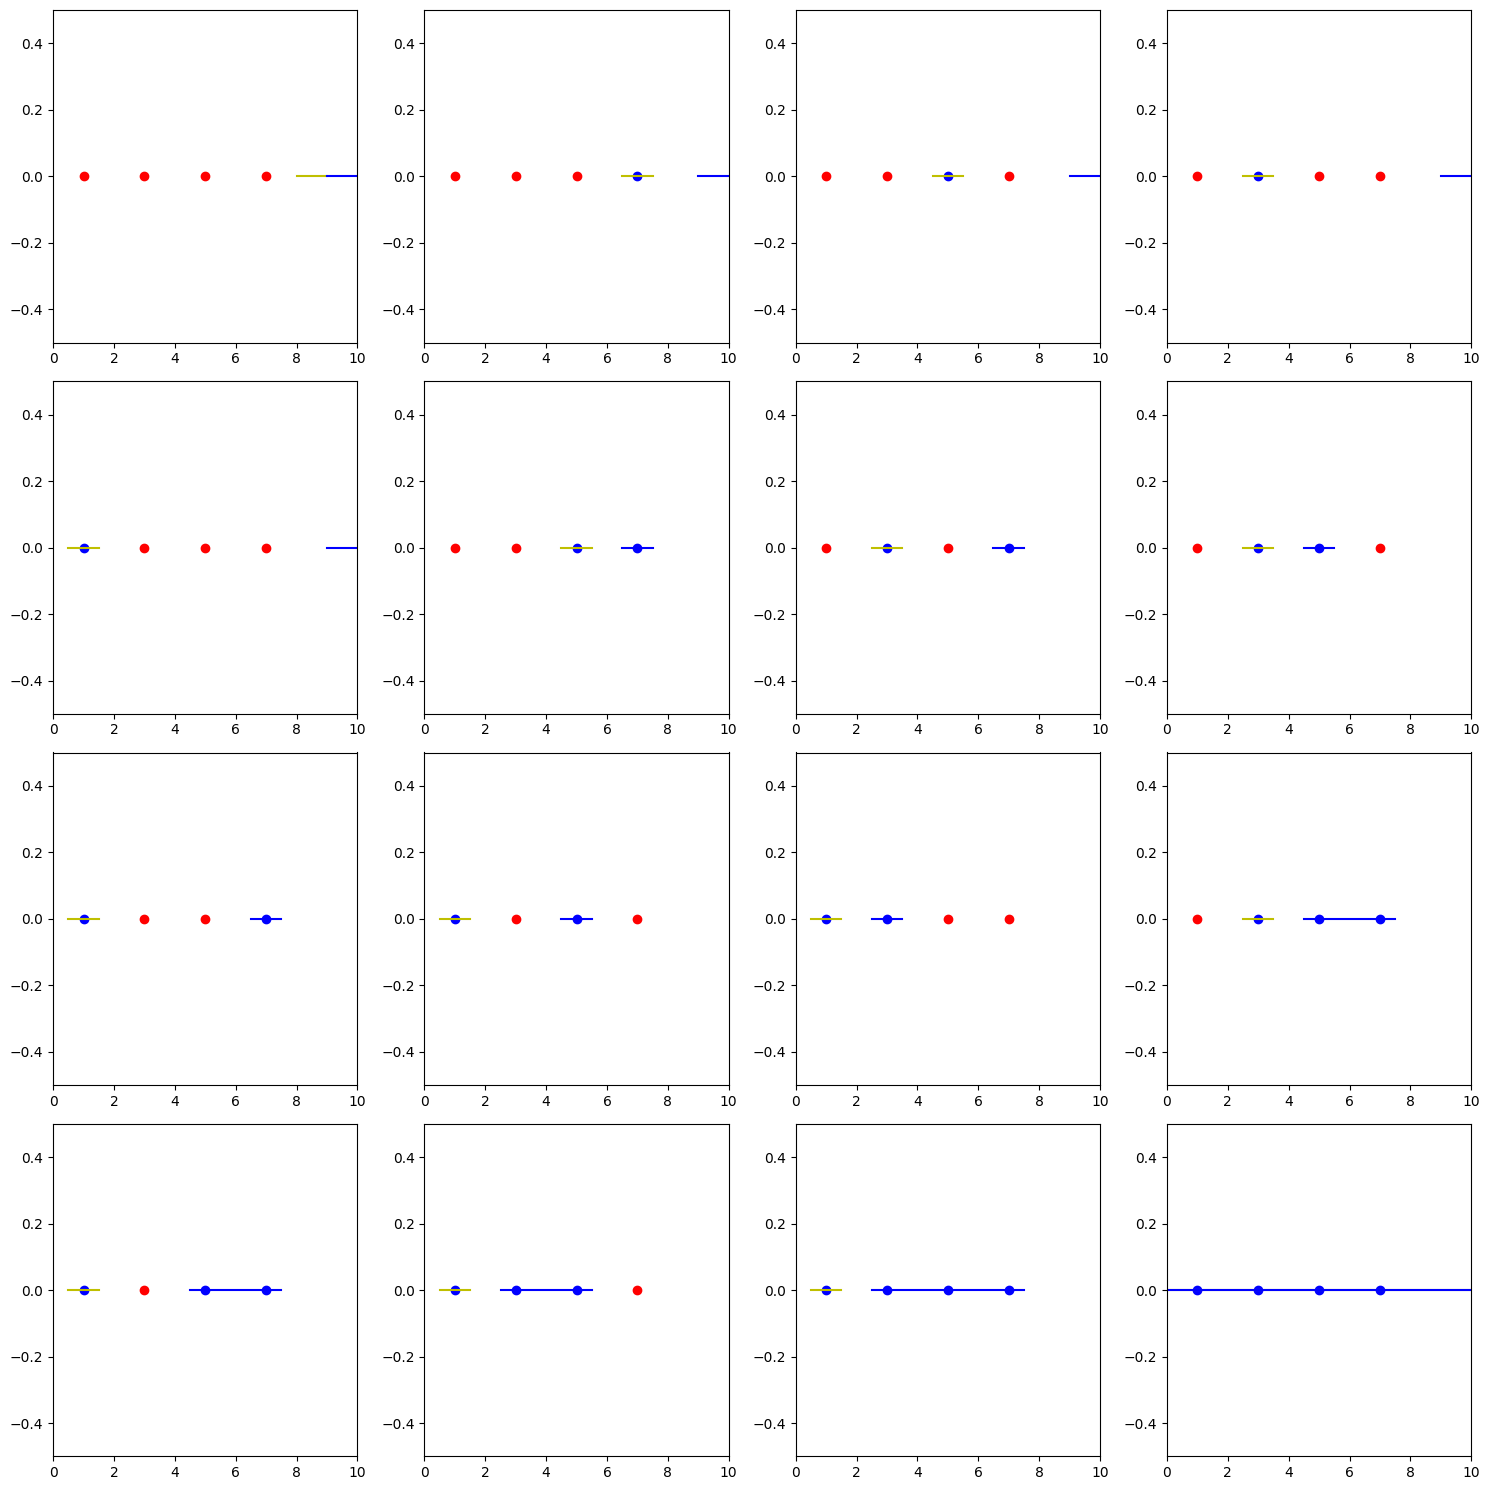

In [6]:
def plot_case(ax, points, intervals):
    # Plot the points
    for point in points:
        if any(interval[0] <= point[0] <= interval[1] for interval in intervals):
            ax.plot(point[0], point[1], 'bo')
        else:
            ax.plot(point[0], point[1], 'ro')

    # Plot the intervals
    colors = ['y', 'b']
    for i, interval in enumerate(intervals):
        ax.plot([interval[0], interval[1]], [0, 0], colors[i % len(colors)] + '-')

    # Set the x-axis and y-axis limits
    ax.set_xlim(0, 10)
    ax.set_ylim(-.5, .5)

# Define the points
points = [(1, 0), (3, 0), (5, 0), (7, 0)]

# Define the cases of intervals
interval_cases = [
    [(8, 9), (9, 10)], 
    [(6.5, 7.5), (9, 10)],
    [(4.5, 5.5), (9, 10)],
    [(4.5, 5.5), (6.5, 7.5)],
    [(2.5, 3.5), (9, 10)],
    [(2.5, 3.5), (6.5, 7.5)],
    [(2.5, 3.5), (4.5, 5.5)],
    [(2.5, 3.5), (4.5, 7.5)],
    [(0.5, 1.5), (9, 10)],
    [(0.5, 1.5), (6.5, 7.5)],
    [(0.5, 1.5), (4.5, 5.5)],
    [(0.5, 1.5), (4.5, 7.5)],
    [(0.5, 1.5), (2.5, 3.5)],
    [(0.5, 1.5), (2.5, 7.5)],
    [(0.5, 1.5), (2.5, 5.5)],
    [(0, 10), (0, 10)],
]

# Sort the cases based on the number of red points in reverse order
interval_cases.sort(key=lambda intervals: sum(1 for point in points if not any(interval[0] <= point[0] <= interval[1] for interval in intervals)), reverse=True)

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

# Create the plots for each case
for i, intervals in enumerate(interval_cases):
    ax = axs[i // 4, i % 4]
    plot_case(ax, points, intervals)

# Show the plot
plt.tight_layout()
plt.show()

With $N = 5$, it is 32 possibilities hence we can't visualize it.

Let's define the special case one, 5 points, 3 blue (denoted by 1) and 2 red (denoted by -1). They are interleaved as follows:

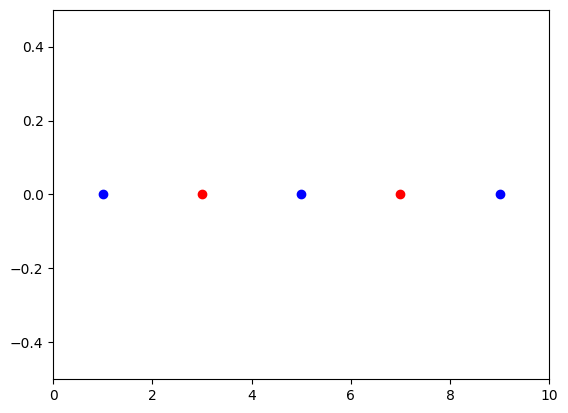

In [7]:
import matplotlib.pyplot as plt

# Define the points and their colors
points = [(1, 0), (3, 0), (5, 0), (7, 0), (9, 0)]

# Define the colors for the points
colors = ['b', 'r']

# Plot the points with different colors
for i, point in enumerate(points):
    plt.plot(point[0], point[1], colors[i % len(colors)] + 'o')
    
# Set the x-axis and y-axis limits
plt.xlim(0, 10)
plt.ylim(-.5, .5)

# Show the plot
plt.show()

We realize that it's not possible to create that split using just two intervals. This implies that the 2-Intervals hypothesis set can't shatter 5 points, leading us to conclude that $N = 5$ is the smallest break point.

[6] The correct answer is [c] 5

## 7.

For the generality, we have $h(x)$ as follows:
$$H=f(x)=
\begin{cases}
    +1,& \text{if } a\le x \le b \text{  or  } c\le x \le d\\
    -1,              & \text{otherwise}
\end{cases}$$
We consider the following:
- If $a,b,c,d$ are distinct, the number of ways to place these 4 points into $N+1$ regions (to create 2 positive zones) is: ${{N+1}\choose{4}}$
- If 2 or 3 points duplicated, there will only be 1 positive region (similar to the positive interval) so the number of possible regions is: ${{N+1}\choose{2}}$
- In the case where all 4 points are the same, there is only 1 region.

Hence, the number of possible regions is: ${{N+1}\choose{4}} + {{N+1}\choose{2}} + 1$

[7] The correct answer is [c] ${{N+1}\choose{4}} + {{N+1}\choose{2}} + 1$

## 8.

With M intervals, we can cover up to 2M points, with each point having the possibility of being either within or outside an interval. But, if we introduce an additional point (bringing the total to $2M+1$), there will be at least one point that is not covered by any interval. This is because the intervals are disjoint, and the total number of points is odd.

[8] The correct answer is [d] $2M+1$

# Convex Sets: The Triangle

## 9.

In [8]:
def plot_points_on_circle(N):
    # Generate N points on the circle
    center = (0, 0)
    radius = 1
    
    angles = np.linspace(0, 2*np.pi, N, endpoint=False)
    x_points = center[0] + radius * np.cos(angles)
    y_points = center[1] + radius * np.sin(angles)

    plt.figure(figsize=(9, 9))
    
    # Create a list of colors
    colors = ['red' if i % 2 != 0 else 'blue' for i in range(N)]
    
    # Plot the points with the colors
    plt.scatter(x_points, y_points, color=colors)

    # Draw the circle
    circle = plt.Circle(center, radius, fill=False)
    plt.gca().add_patch(circle)

    # Step 1: Separate the coordinates of the blue points
    x_blue = x_points[::2]
    y_blue = y_points[::2]

    # Step 2: Draw the triangle
    triangle = Polygon(np.column_stack((x_blue, y_blue)), fill=True)
    plt.gca().add_patch(triangle)

    # Set equal aspect ratio so the circle isn't distorted
    plt.gca().set_aspect('equal', adjustable='box')

    # Show the plot
    plt.show()

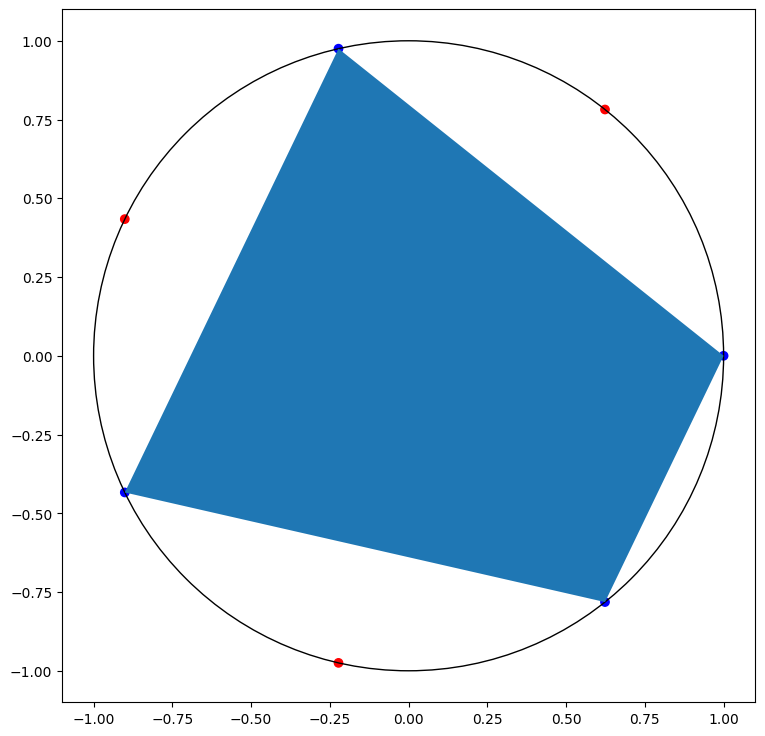

In [9]:
plot_points_on_circle(N=7)

Suppose we add a new point $x_8$ and want it to be classified as +1, shown by figure below.

![](./imgs/9_1.png)

As shown in the figure, the only way to classify $x_8$ as +1 is to orient the triangle in the direction of the orange lines. However, adding $x_8$ and adjusting the triangle to classify it as +1 will inevitably affect the classification of the other points. Which is ambiguous. Hence, the triangle cannot shatter 8 points.

[9] The correct answer is [b] 7

# Convex Sets: Concentric Circles

## 10.

In the context of the problem, the point ($x_1, x_2$) lying within the annulus of two concentric circles can also be represented in polar coordinates as ($r, \theta$).

The conversion from polar to Cartesian coordinates is given by: 
- $x_1 = r\cos(\theta)$
- $x_2 = r\sin(\theta)$ 

We have:
$ a^2 \leq x^2_1 + x^2_2 \leq b^2 $ 

$ \Leftrightarrow a^2 \leq (r\cos\theta)^2 + (r\sin\theta)^2 \leq b^2 $

$ \Leftrightarrow a^2 \leq r^2 \leq b^2 $

$ \Leftrightarrow a \leq r \leq b $ (for the simplicity, we assume b > a > 0)

By using non-linear transformation, we can transform the concentric circles into a positive interval. Hence, the growth function of concentric circles is $m_H(N) = {{N+1} \choose 2} + 1$.

[10] The correct answer is [b] ${{N+1} \choose 2} + 1$

## References
[1] [Exercise 5, 10](https://github.com/itacdonev/Learning_From_Data_Caltech/blob/master/HW3/HW3.ipynb)

[2] [Exercise 6](https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_3/homework_3_problem_6_7_8_Fun_With_Intervals.ipynb)

[3] [Exercise 8, 9](https://rpubs.com/giuliano_mega/376525)

[4] [Exercise 9](https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_3/homework_3_problem_9_Triangles.ipynb)